In [1]:
import numpy as np
import pylab as plt

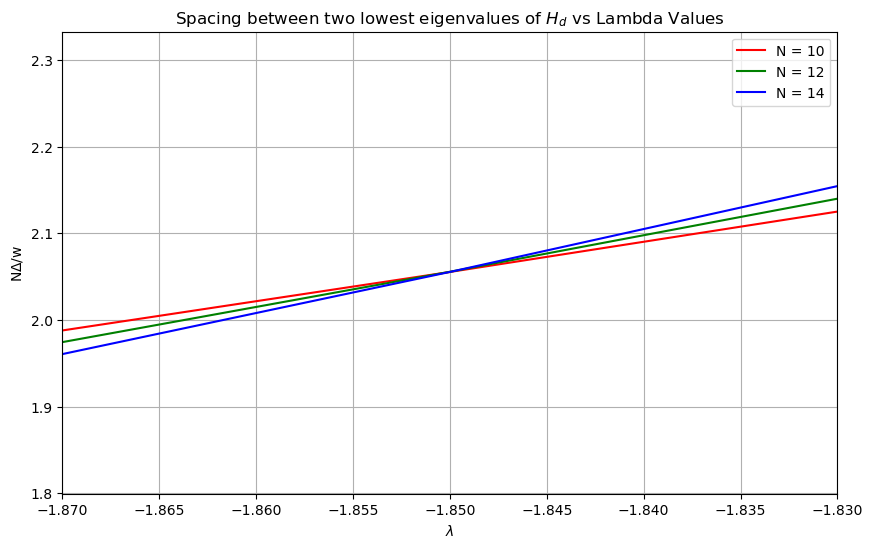

In [4]:
# Sort lambda_values and corresponding spacings
diff_list_10 = [0.18893267744783013, 0.1970936588934786, 0.20552802667700962, 0.2142380294693491, 0.22322544122038532] 
diff_list_12 = [0.15470832647885047, 0.16283766045793868, 0.1712923248885847, 0.1800751040732642, 0.18918796111538683]
diff_list_14 = [0.1302600687130422, 0.13834523752601768, 0.14680752553129395, 0.15565030551357495, 0.16487564698223522]

amount = 0.05
diff_list_10_1 = []
diff_list_12_1 = []
diff_list_14_1 = []
for number in diff_list_10:
    diff_list_10_1.append(number - amount)
for number in diff_list_12:
    diff_list_12_1.append(number - amount)
for number in diff_list_14:
    diff_list_14_1.append(number - 0.005)
    


w= 1
lambda_values = np.linspace(-1.9, -1.8, 5)
sorted_indices = np.argsort(lambda_values)
sorted_lambda_values = np.array(lambda_values)[sorted_indices]
sorted_spacings10 = np.array(diff_list_10)[sorted_indices]
sorted_spacings12 = np.array(diff_list_12)[sorted_indices]
sorted_spacings14 = np.array(diff_list_14)[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(sorted_lambda_values,  10*sorted_spacings10 / w, '-', markersize=1, label = 'N = 10', color='red')
plt.plot(sorted_lambda_values,  12*sorted_spacings12 / w, '-', markersize=1, label = 'N = 12', color='green')
plt.plot(sorted_lambda_values,  14*sorted_spacings14 / w, '-', markersize=1, label = 'N = 14' , color='blue')
plt.xlim([-1.87, -1.83])
#plt.ylim([1.975, 2.15])
plt.xlabel(r'$\lambda$')
plt.ylabel('N$\Delta$/w')
plt.title('Spacing between two lowest eigenvalues of $H_d$ vs Lambda Values')
plt.grid(True)
plt.legend()
plt.show()


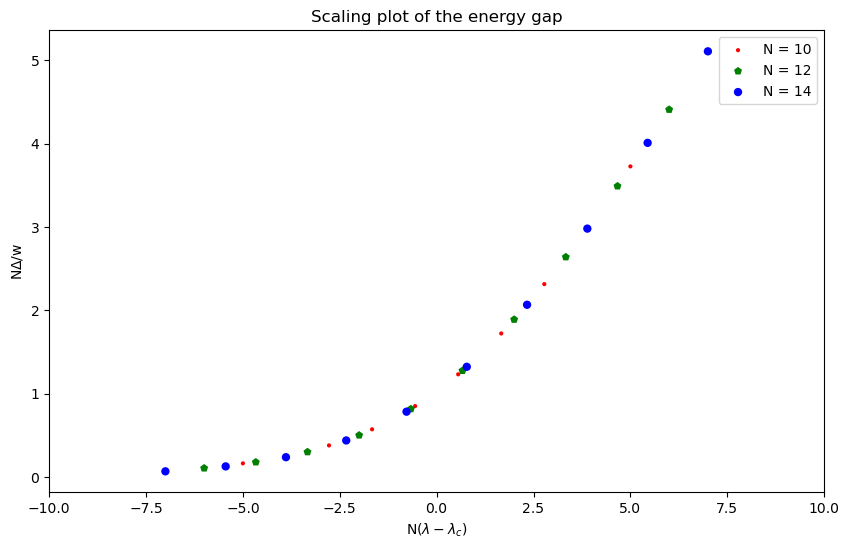

In [ ]:
# Sort lambda_values and corresponding spacings

diff_list_10 = [0.03280585797578084, 0.04989460236771848, 0.07587709743300586, 0.11459470687383799, 0.17031667280765106, 0.24656942379702862, 0.3446695607020569, 0.46306951692639053, 0.5981417414244525, 0.7456742069509019]
diff_list_12 = [0.01775651626860153, 0.02985197559678454, 0.050212094845491606, 0.0836747114283547, 0.13618223266322005, 0.21285848599569412, 0.3152136266609187, 0.4401477218432799, 0.5819693188950552, 0.7351223699472271]
diff_list_14 = [0.009813694797280448, 0.018258821871114606, 0.03403283572637861, 0.0627355696403491, 0.11205242758333966, 0.1890385861231607, 0.295370018237314, 0.4259625271041667, 0.5729843507991266, 0.7299272994261763]

lambda_c = -1.850
lambda_values = np.linspace(-2.85, -0.85, 10)

plt.figure(figsize=(10, 6))
plt.scatter(5 * (lambda_values - lambda_c), 5 * np.array(diff_list_10) / w, label='N = 10',color='red', marker= '.', edgecolors='none')
plt.scatter(6 * (lambda_values - lambda_c), 6 * np.array(diff_list_12) / w, label='N = 12', color='green', marker = 'p', edgecolors= 'none')
plt.scatter(7 * (lambda_values - lambda_c), 7 * np.array(diff_list_14) / w, label='N = 14', color='blue', marker = 'o', edgecolors='none')
plt.xlim([-10.0,10.0])
plt.xlabel(r'N($\lambda - \lambda_c)$')
plt.ylabel('N$\Delta$/w')
plt.title('Scaling plot of the energy gap')
plt.grid(False)
plt.legend()
plt.show()



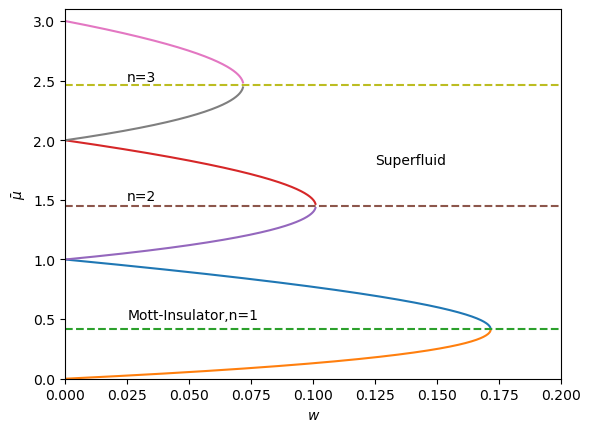

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate mu as a function of w
def calculate_mu(w, n0):
    discriminant = (2 * n0 - 1 - w)**2 - 4 * (n0**2 - n0 + w)

    # Check if discriminant is non-negative
    if discriminant >= 0:
        mu_positive = ((2 * n0 - 1 - w) + np.sqrt(discriminant)) / 2
        mu_negative = ((2 * n0 - 1 - w) - np.sqrt(discriminant)) / 2

        return mu_positive, mu_negative
    else:
        return None, None

# Generate w values within the valid range
w_values = np.linspace(0, 0.2, 1000)

# Parameters for different values of n0
n0_values = [1, 2, 3]

# Plot the Mott lobes for different values of n0
for n0 in n0_values:
    mu_positive_values, mu_negative_values = zip(*[calculate_mu(w, n0) for w in w_values])
    mu_const = -1.0 + np.sqrt(n0 * (n0 + 1))
    mu_const_values = np.full_like(w_values, mu_const)

    plt.plot(w_values, mu_positive_values, label=r'$\mu_+$, $n_0={}$'.format(n0))
    plt.plot(w_values, mu_negative_values, label=r'$\mu_-$, $n_0={}$'.format(n0))
    plt.plot(w_values, mu_const_values, label=r'$\mu$, $n_0={}$', linestyle='--')
    


plt.annotate('Mott-Insulator,n=1', xy=(0.025,0.5))
plt.annotate('n=2', xy=(0.025,1.5))
plt.annotate('n=3', xy=(0.025,2.5))
plt.annotate('Superfluid', xy=(0.125,1.8))
plt.xlabel(r'$w$')
plt.ylabel(r'$\bar{\mu}$')
plt.xlim([0,0.2])
plt.ylim([0,3.1])
plt.grid(False)
plt.show()
